In [4]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
# Alternate # plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec

# Warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
cd drive/MyDrive

In [ ]:
df = pd.read_csv('train_clean.csv')

In [10]:
df.drop(df.columns[0],inplace=True, axis=1)

In [11]:
# Word Length
df["Word Count"] = df['Review Text'].str.split().apply(len)

In [12]:
# Character Length
df["Character Count"] = df['Review Text'].apply(len)

In [13]:
# Int for Positive and Negative Reviews
df["Label"] = 0
df.loc[df.Rating < 3,["Label"]] = 0
df.loc[df.Rating == 3,["Label"]] = 1
df.loc[df.Rating > 3,["Label"]] = 2

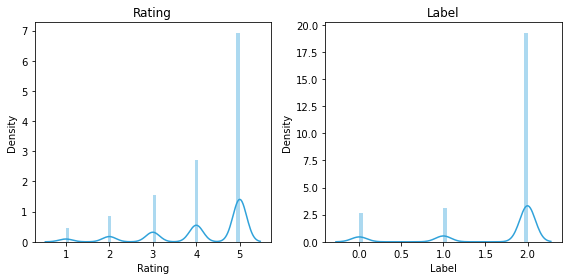

In [15]:
# Continous Distributions
f, ax = plt.subplots(1,2,figsize=(8,4), sharey=False)
sns.distplot(df.Rating, ax=ax[0])
ax[0].set_title("Rating")
ax[0].set_ylabel("Density")

sns.distplot(df.Label, ax=ax[1])
ax[1].set_title("Label")
ax[1].set_ylabel("Density")

plt.tight_layout()
plt.show()

# Most common words

One gram

In [16]:
stopwords = set(STOPWORDS)
size = (10,7)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    
# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

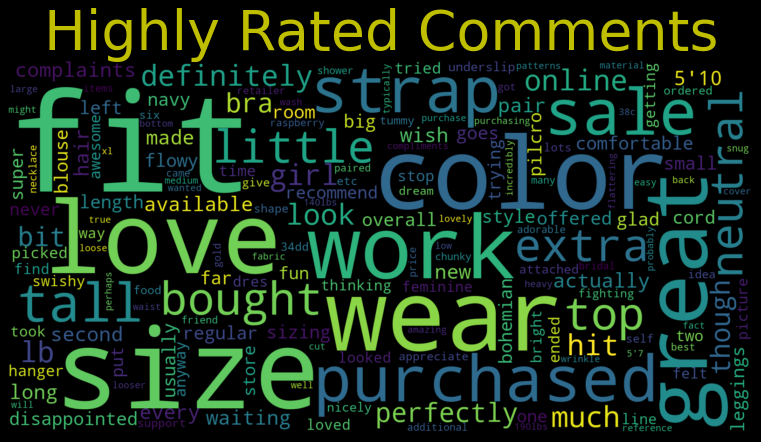

In [17]:
# Highly Raited
title ="Highly Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) > 3]
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

In [ ]:


# Cloud
#a = cloud(text= temp.values, title=title,stopwords= new_stop)
wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=new_stop,
                         ).generate(str(temp.values))

wordcloud.words_                  


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

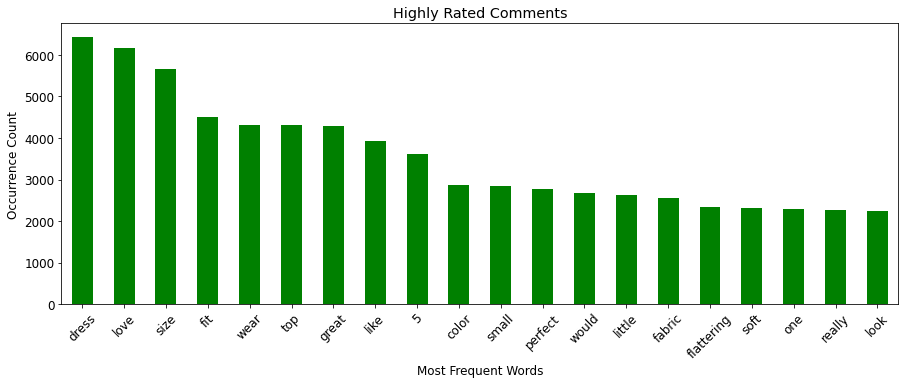

In [26]:
wordfreq(preprocessing(temp),20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()

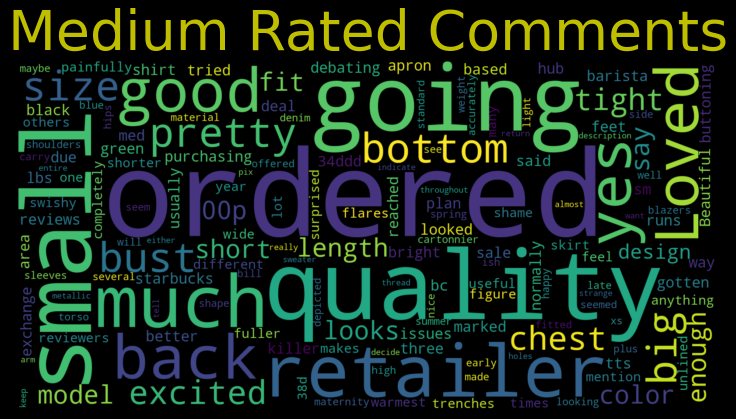

In [27]:
# Medium Raited
title ="Medium Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) == 3]
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite", "jacket", "blazer"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

In [ ]:
# Cloud
#a = cloud(text= temp.values, title=title,stopwords= new_stop)
wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=new_stop,
                         ).generate(str(temp.values))

wordcloud.words_     

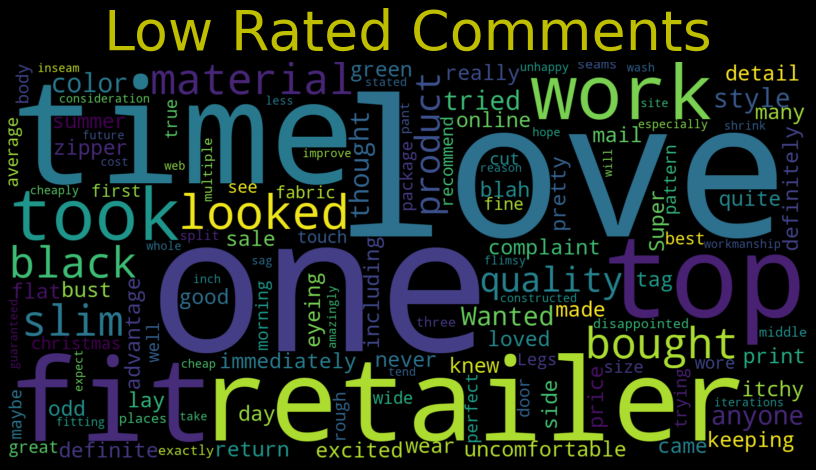

In [29]:
# Low Raited
title ="Low Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) < 3]
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite", "jacket", "blazer"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

In [ ]:
# Cloud
#a = cloud(text= temp.values, title=title,stopwords= new_stop)
wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=new_stop,
                         ).generate(str(temp.values))

wordcloud.words_  

In [ ]:
print("Count of students ->",
      df[(df["Sentiment"] == "Neutral")]['Sentiment'].count())

N grams

In [31]:
## Helper Functions
from nltk.util import ngrams
from collections import Counter
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(data, gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        table = pd.DataFrame(gramfreq(preprocessing(data),i,length).reset_index())
        table.columns = ["{}-Gram".format(i),"Occurrence"]
        out = pd.concat([out, table], axis=1)
    return out

In [35]:
print("Non-Recommended Items")
gram_table(data= df['Review Text'][df["Recommended IND"].astype(int) == 0], gram=[1,2,3,4,5], length=30)

Non-Recommended Items


,1-Gram,Occurrence,2-Gram,Occurrence,3-Gram,Occurrence,4-Gram,Occurrence,5-Gram,Occurrence
0,dress,1539,wanted love,186,really wanted love,53,really wanted like top,8,wearing medium photos reference measurements,3
1,like,1443,going back,168,wanted love dress,39,really wanted love dress,8,medium photos reference measurements 38,3
2,top,1261,looked like,147,really wanted like,36,really wanted like dress,8,photos reference measurements 38 30,3
3,fit,1093,looks like,128,wanted love top,23,looked like maternity top,7,reference measurements 38 30 40,3
4,would,1072,really wanted,122,made look like,23,5 7 140 lbs,6,reference 5 7 125 lb,3
5,fabric,1006,made look,111,fit true size,23,5 4 120 lbs,6,really wanted love top material,2
6,size,968,look like,99,way much fabric,22,wanted love dress much,5,ordered review back pairs went,2
7,back,820,true size,86,ordered usual size,20,really wanted love top,5,pair jeans wanted pajama jeans,2
8,look,762,5 4,85,like maternity top,19,measurements 38 30 40,5,jeans wanted pajama jeans would,2
9,small,729,felt like,85,sadly going back,18,5 7 125 lb,4,wanted pajama jeans would ordered,2


In [36]:
print("Recommended Items")
gram_table(data= df['Review Text'][df["Recommended IND"].astype(int) == 1], gram=[1,2,3,4,5], length=30)

Recommended Items


,1-Gram,Occurrence,2-Gram,Occurrence,3-Gram,Occurrence,4-Gram,Occurrence,5-Gram,Occurrence
0,dress,6863,true size,991,fits true size,200,compliments every time wear,35,34b 26 waist 36 hips,20
1,love,6394,love dress,518,fit true size,158,26 waist 36 hips,25,get compliments every time wear,16
2,size,6040,5 4,502,received many compliments,125,looks great skinny jeans,23,115 lbs 30 dd 26,14
3,fit,4785,usually wear,473,runs true size,114,34b 26 waist 36,20,5 2 currently 33 25,13
4,top,4595,looks great,462,love love love,108,5 4 120 lbs,19,5 1 5 115 lbs,12
5,wear,4530,fit perfectly,446,usually wear size,89,115 lbs 30 dd,19,lbs 30 dd 26 5,12
6,great,4431,well made,419,ordered usual size,66,get compliments every time,18,30 dd 26 5 waist,10
7,like,4291,love top,405,every time wear,65,love love love dress,18,115 lbs 30dd 26 5,10
8,5,3804,5 3,390,small fit perfectly,61,usually wear size 4,16,2 currently 33 25 37,10
9,color,3084,fits perfectly,385,small fits perfectly,57,5 5 135lbs 34c,15,5 5 tall 145 lbs,10
